# 2D blob detection
Author: Felipe Delestro (fima@dtu.dk)

This Notebook performs a simple blob detection in a 2D image

In [1]:
import numpy as np
import qim3d
import matplotlib.pyplot as plt
from skimage.feature import blob_log

## Load and prepare the data

In [2]:
# Load the data using the qim3d data loader
vol = qim3d.io.load("../resources/img3d/cement_128x128x128.tif")

In [3]:
# Select one slice from the 3D volume
img = vol[32]

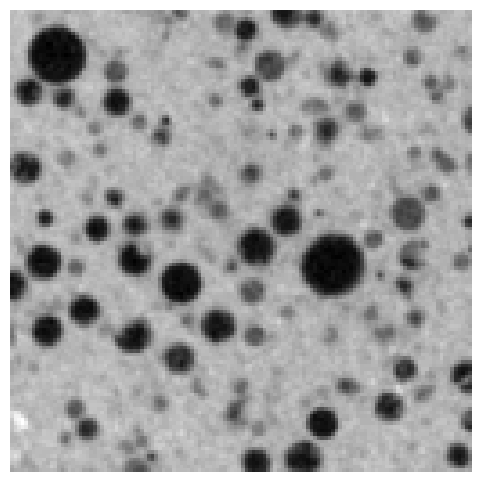

In [4]:
# Check the slice
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(img,  cmap='gray')
ax.set_axis_off()

In [5]:
# Blob detection works for objects brighter than the background, so we invert the image
img = np.invert(img)

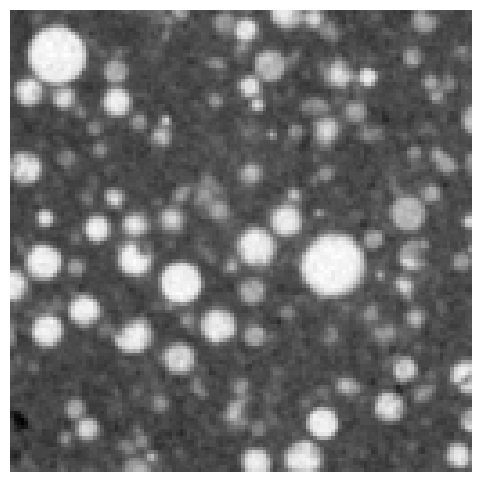

In [6]:
# Check the slice
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(img,  cmap='gray')
ax.set_axis_off()

## Blob detection

In [7]:
detections = blob_log(img, min_sigma=2, max_sigma=6, num_sigma=12, threshold=.02)
print (f"Total of {len(detections)} detected objects")

Total of 115 detected objects


### Display results

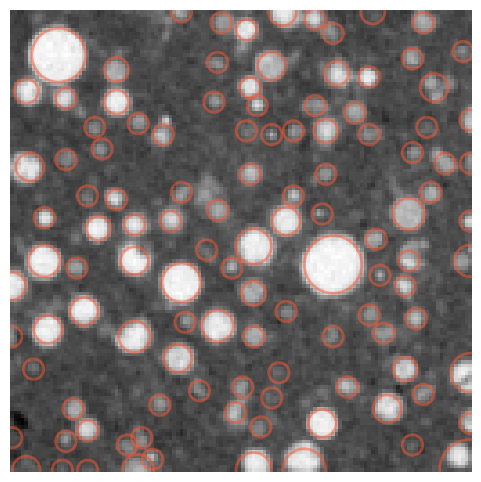

In [8]:
# Compute radii in the 3rd column.
detections[:, 2] = detections[:, 2] * np.sqrt(2)

# Show circles
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img, cmap='gray')
for detection in detections:
    y, x, r = detection
    c = plt.Circle((x, y), r, color="#FF5733", linewidth=2, fill=False, alpha=0.5)
    ax.add_patch(c)
    
ax.set_axis_off()
plt.show()